In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('ggplot')

In [8]:
cars = pd.read_csv("./cars2018.csv")
cars.head()

,Model,Model Index,Displacement,Cylinders,Gears,Transmission,MPG,Aspiration,Lockup Torque Converter,Drive,Max Ethanol,Recommended Fuel,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel injection
0,Acura NSX,57,3.5,6,9,Manual,21,Turbocharged/Supercharged,Y,All Wheel Drive,10,Premium Unleaded Required,2,2,Direct ignition
1,ALFA ROMEO 4C,410,1.8,4,6,Manual,28,Turbocharged/Supercharged,Y,"2-Wheel Drive, Rear",10,Premium Unleaded Required,2,2,Direct ignition
2,Audi R8 AWD,65,5.2,10,7,Manual,17,Naturally Aspirated,Y,All Wheel Drive,15,Premium Unleaded Recommended,2,2,Direct ignition
3,Audi R8 RWD,71,5.2,10,7,Manual,18,Naturally Aspirated,Y,"2-Wheel Drive, Rear",15,Premium Unleaded Recommended,2,2,Direct ignition
4,Audi R8 Spyder AWD,66,5.2,10,7,Manual,17,Naturally Aspirated,Y,All Wheel Drive,15,Premium Unleaded Recommended,2,2,Direct ignition


In [9]:
cars.describe()

,Model Index,Displacement,Cylinders,Gears,MPG,Max Ethanol,Intake Valves Per Cyl,Exhaust Valves Per Cyl
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,201.277098,3.087238,5.563811,6.935315,23.195804,15.292832,1.925699,1.922203
std,212.970084,1.322116,1.827500,1.636529,5.586052,15.699689,0.262374,0.267969
min,1.000000,1.000000,3.000000,1.000000,11.000000,10.000000,1.000000,1.000000
25%,36.000000,2.000000,4.000000,6.000000,19.000000,10.000000,2.000000,2.000000
50%,108.000000,3.000000,6.000000,7.000000,23.000000,10.000000,2.000000,2.000000
75%,323.750000,3.600000,6.000000,8.000000,26.000000,15.000000,2.000000,2.000000
max,821.000000,8.000000,16.000000,10.000000,58.000000,85.000000,2.000000,2.000000


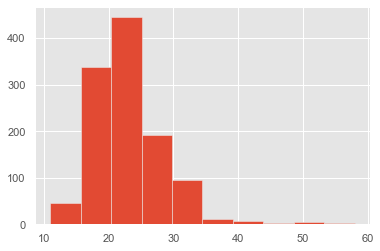

In [12]:
plt.hist(cars['MPG'])
plt.show()

In [15]:
cars_vars = cars.drop(["Model", "Model Index"], 1)

In [52]:
X = cars_vars.drop(["MPG"],1)
y = np.log(cars_vars["MPG"])

In [53]:
nominal = ['Transmission', 'Aspiration', 'Drive', 'Lockup Torque Converter', 'Recommended Fuel', 'Fuel injection']
X_nominal = X[nominal]
X_nominal['Aspiration'].value_counts()

Turbocharged/Supercharged    621
Naturally Aspirated          523
Name: Aspiration, dtype: int64

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [55]:
X = X.drop(X[nominal], 1)
X.head()

,Displacement,Cylinders,Gears,Max Ethanol,Intake Valves Per Cyl,Exhaust Valves Per Cyl
0,3.5,6,9,10,2,2
1,1.8,4,6,10,2,2
2,5.2,10,7,15,2,2
3,5.2,10,7,15,2,2
4,5.2,10,7,15,2,2


In [56]:
nominal_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse=False))
nom = pd.DataFrame(nominal_pipe.fit_transform(X_nominal),
             columns=nominal_pipe.steps[1][1].get_feature_names(nominal))
X = X.join(nom)
X.head()

,Displacement,Cylinders,Gears,Max Ethanol,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Aspiration_Naturally Aspirated,...,"Drive_2-Wheel Drive, Rear",Drive_4-Wheel Drive,Drive_All Wheel Drive,Lockup Torque Converter_N,Lockup Torque Converter_Y,Recommended Fuel_Premium Unleaded Recommended,Recommended Fuel_Premium Unleaded Required,Recommended Fuel_Regular Unleaded Recommended,Fuel injection_Direct ignition,Fuel injection_Multipoint/sequential ignition
0,3.5,6,9,10,2,2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.8,4,6,10,2,2,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,5.2,10,7,15,2,2,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,5.2,10,7,15,2,2,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,5.2,10,7,15,2,2,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()
lm.fit( X, y )
lm.score(X, y)

0.806546268904161

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)

In [79]:

lm2 = LinearRegression()

lm2.fit(X_train, y_train)

lmy_pred = lm2.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, lmy_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, lmy_pred)}")

MSE: 6.392157948409616
MAE: 1.898337036443867


In [80]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

foresty_pred = forest.predict(X_test)
print(f"MSE: {metrics.mean_squared_error(y_test, foresty_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, foresty_pred)}")

MSE: 4.113433194937681
MAE: 1.3564969449423523


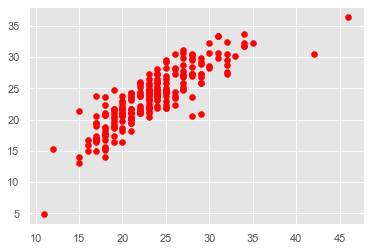

In [87]:
plt.scatter(y_test, lmy_pred, color = "red")
plt.show()

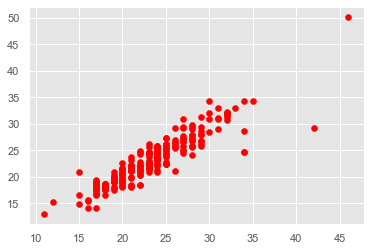

In [88]:
plt.scatter(y_test, foresty_pred, color = "red")
plt.show()